## Competitive neural network
We now explore the dynamics of a competitive two population neural network as we change its parameters. For simplicity. We simulate using the forward Euler method and we see where the trajectory of the system goes given mild changes to the initial conditions.

The general form of the model is
$$
\frac{du_L}{dt} = -u_L + f(I_L + \alpha u_L - \beta u_R), \\
\frac{du_R}{dt} = -u_R + f(I_R + \alpha u_R - \beta u_L),
$$
where the firing rate function is $f(x) = 1/(1+{\rm exp}[-\gamma x])$. Depending on the inputs $I_L$ and $I_R$ and the strength of the excitatory $\alpha$ and inhibitory $\beta$ coupling, we find differing dynamics.

First, we will demonstrate how presenting no input to the system leads to a steady state where both populations have matched but weak activity.

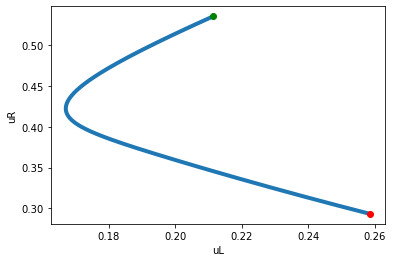

In [8]:
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt

# model parameters
a = 0.1     # excitatory coupling
b = 0.8       # strength of inhibition
g = 5      # gain of the firing rate function
IL = 0      # left input
IR = 0       # right input

T = 20      # total time to run
dt = 0.01   # time step
nt = int(np.round(T/dt)+1)     # number of entries in vector array (mV)
tvec = np.linspace(0,T,nt)     # time vector (ms)

uL = np.zeros(nt)   # population L
uR = np.zeros(nt)   # population R
uL[0]=rnd.uniform()
uR[0]=rnd.uniform()

for j in np.arange(nt-1):
    uL[j+1] = uL[j]+dt*(-uL[j]+1/(1+np.exp(-g*(IL+a*uL[j]-b*uR[j]))))
    uR[j+1] = uR[j]+dt*(-uR[j]+1/(1+np.exp(-g*(IR+a*uR[j]-b*uL[j]))))
    
fig = plt.figure()
plt.plot(uL,uR,linewidth=4.0)
plt.plot(uL[0],uR[0],'go')
plt.plot(uL[-1],uR[-1],'ro')
plt.xlabel('uL')
plt.ylabel('uR')
plt.show()   

Now let us study what occurs when we run the system with $I_L$ larger than $I_R$ and both nonzero.

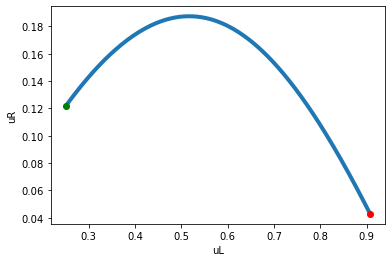

In [12]:
# model parameters
a = 0.1     # excitatory coupling
b = 0.8       # strength of inhibition
g = 5      # gain of the firing rate function
IL = 0.4      # left input
IR = 0.1       # right input

uL = np.zeros(nt)   # population L
uR = np.zeros(nt)   # population R
uL[0]=rnd.uniform()
uR[0]=rnd.uniform()

for j in np.arange(nt-1):
    uL[j+1] = uL[j]+dt*(-uL[j]+1/(1+np.exp(-g*(IL+a*uL[j]-b*uR[j]))))
    uR[j+1] = uR[j]+dt*(-uR[j]+1/(1+np.exp(-g*(IR+a*uR[j]-b*uL[j]))))
    
fig = plt.figure()
plt.plot(uL,uR,linewidth=4.0)
plt.plot(uL[0],uR[0],'go')
plt.plot(uL[-1],uR[-1],'ro')
plt.xlabel('uL')
plt.ylabel('uR')
plt.show()   

We see that the system approaches a steady state where $u_L > u_R$ indicating the left option is chosen by the network.

Lastly, consider presenting strong inputs to both populations. In this case, it is possible for the system to approach either decision depending on the initial condition.

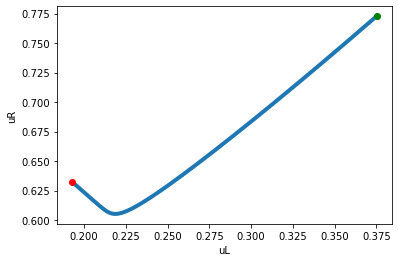

In [14]:
# model parameters
a = 0.1     # excitatory coupling
b = 0.8       # strength of inhibition
g = 5      # gain of the firing rate function
IL = 0.2      # left input
IR = 0.2       # right input

uL = np.zeros(nt)   # population L
uR = np.zeros(nt)   # population R
uL[0]=rnd.uniform()
uR[0]=rnd.uniform()

for j in np.arange(nt-1):
    uL[j+1] = uL[j]+dt*(-uL[j]+1/(1+np.exp(-g*(IL+a*uL[j]-b*uR[j]))))
    uR[j+1] = uR[j]+dt*(-uR[j]+1/(1+np.exp(-g*(IR+a*uR[j]-b*uL[j]))))
    
fig = plt.figure()
plt.plot(uL,uR,linewidth=4.0)
plt.plot(uL[0],uR[0],'go')
plt.plot(uL[-1],uR[-1],'ro')
plt.xlabel('uL')
plt.ylabel('uR')
plt.show()  